In [2]:
%pip install pandas psycopg2-binary sqlalchemy matplotlib scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import psycopg2 as db
from sqlalchemy import create_engine
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import os

In [4]:
db_type = 'postgresql'
host = 'database'
port = 5432
db_name = os.environ.get('POSTGRES_DB')
user = os.environ.get('POSTGRES_USER')
password = os.environ.get('POSTGRES_PASSWORD')

conn_uri = f"{db_type}://{user}:{password}@{host}:{port}/{db_name}"
alchemyEngine = create_engine(conn_uri)
db_conn = alchemyEngine.connect();

In [5]:
""" Query frequency perchase per user average in month """
db_conn = alchemyEngine.connect()
## Group user frequency
query = """
    SELECT
        user_id,
        AVG(times) as frequency
    FROM (
        SELECT
            user_id,
            COUNT(*) as times,
            DATE_TRUNC('month', event_time) AS month
        FROM customers
        WHERE event_type = 'purchase'
        GROUP BY user_id, month
        ORDER BY user_id, month
    ) AS user_month
    GROUP BY user_id
    ORDER BY user_id
"""
df = pd.read_sql(query, db_conn)
df.head()

,user_id,frequency
0,9794320,4.0
1,10079204,2.0
2,10280338,8.5
3,12055855,4.0
4,12936739,2.0


In [6]:
df.describe()

,user_id,frequency
count,9.265100e+04,92651.000000
mean,5.212751e+08,8.683773
std,8.685733e+07,10.463081
min,9.794320e+06,1.000000
25%,4.861277e+08,3.000000
50%,5.565920e+08,6.000000
75%,5.772530e+08,11.000000
max,6.088172e+08,438.000000


In [7]:
"""" Standard Scaler """
X = df[['frequency']]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled

array([[-0.44765001],
       [-0.63879934],
       [-0.01756404],
       ...,
       [-0.44765001],
       [-0.06535137],
       [-0.54322467]], shape=(92651, 1))

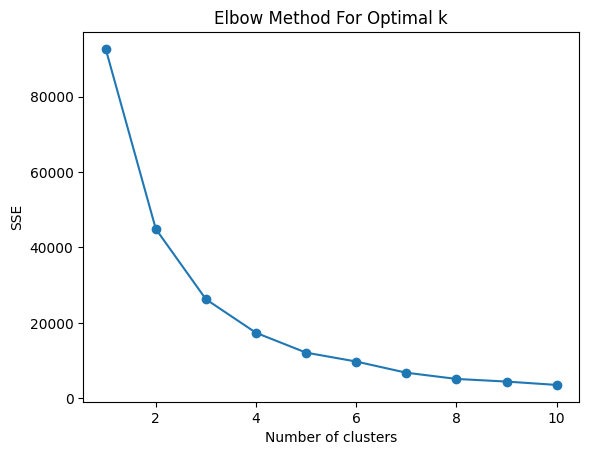

In [8]:
# Step 3: Compute SSE for a range of k values
""" Plot Elbow Method Chart """
sse = []
K = range(1, 11)
for k in K:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X_scaled)
    sse.append(km.inertia_)

plt.plot(K, sse, 'o-')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal k')
plt.show()